In [1]:
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
%matplotlib inline

In [2]:
import os
os.getcwd()

'/storage/MLND_Capstone_Project_2019/notebooks'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator w/ no augmentation
#Scaling for pixels
piece_train_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_test_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_valid_datagen = ImageDataGenerator(
    rescale = 1./255)


#Flow data from directory

piece_train_iter = piece_train_datagen.flow_from_directory(
    directory = '../data/piece_data/train',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

piece_test_iter = piece_test_datagen.flow_from_directory(
    directory = '../data/piece_data/test',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle=False,
    seed=42
)

piece_valid_iter = piece_valid_datagen.flow_from_directory(
    directory = '../data/piece_data/valid',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

Found 1227 images belonging to 7 classes.
Found 335 images belonging to 7 classes.
Found 331 images belonging to 7 classes.


In [4]:
#Define NN architecture

from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

piece_model = Sequential()
piece_model.add(Conv2D(filters=16, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(135, 135, 1)))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Dropout(0.3))
piece_model.add(GlobalAveragePooling2D())
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dense(2048, activation='relu'))
piece_model.add(Dropout(0.4))
piece_model.add(Dense(7, activation='softmax'))


piece_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 135, 135, 16)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 67, 67, 16)        0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 67, 67, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 33, 33, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        8

In [5]:
# compile the model
from tensorflow.keras.optimizers import RMSprop
piece_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.00001), 
                  metrics=['accuracy'])

STEP_SIZE_TRAIN = piece_train_iter.n/piece_train_iter.batch_size
STEP_SIZE_VALID = piece_valid_iter.n/piece_valid_iter.batch_size



In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='piece_model_1.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
piece_hist = piece_model.fit_generator(generator=piece_train_iter, 
                          steps_per_epoch=STEP_SIZE_TRAIN, 
                          validation_data=piece_valid_iter, 
                          validation_steps=STEP_SIZE_VALID,
                          epochs=1500, 
                          callbacks=[checkpointer], 
                          verbose=2)

Epoch 1/1500

Epoch 00001: val_loss improved from inf to 2.06090, saving model to piece_model_1.weights.best.hdf5
39/38 - 14s - loss: 1.8741 - accuracy: 0.2567 - val_loss: 2.0609 - val_accuracy: 0.1511
Epoch 2/1500

Epoch 00002: val_loss did not improve from 2.06090
39/38 - 9s - loss: 1.7854 - accuracy: 0.3170 - val_loss: 2.0750 - val_accuracy: 0.1511
Epoch 3/1500

Epoch 00003: val_loss did not improve from 2.06090
39/38 - 8s - loss: 1.7355 - accuracy: 0.3146 - val_loss: 2.1458 - val_accuracy: 0.1511
Epoch 4/1500

Epoch 00004: val_loss did not improve from 2.06090
39/38 - 8s - loss: 1.6775 - accuracy: 0.3521 - val_loss: 2.3064 - val_accuracy: 0.1511
Epoch 5/1500

Epoch 00005: val_loss did not improve from 2.06090
39/38 - 8s - loss: 1.6371 - accuracy: 0.3643 - val_loss: 2.5697 - val_accuracy: 0.1511
Epoch 6/1500

Epoch 00006: val_loss did not improve from 2.06090
39/38 - 8s - loss: 1.5866 - accuracy: 0.4010 - val_loss: 2.8977 - val_accuracy: 0.1511
Epoch 7/1500

Epoch 00007: val_loss di

39/38 - 9s - loss: 0.9159 - accuracy: 0.6813 - val_loss: 1.4556 - val_accuracy: 0.4441
Epoch 46/1500

Epoch 00046: val_loss did not improve from 1.45556
39/38 - 9s - loss: 0.8950 - accuracy: 0.6813 - val_loss: 1.4576 - val_accuracy: 0.4471
Epoch 47/1500

Epoch 00047: val_loss improved from 1.45556 to 1.45540, saving model to piece_model_1.weights.best.hdf5
39/38 - 9s - loss: 0.8606 - accuracy: 0.6870 - val_loss: 1.4554 - val_accuracy: 0.4411
Epoch 48/1500

Epoch 00048: val_loss improved from 1.45540 to 1.45311, saving model to piece_model_1.weights.best.hdf5
39/38 - 9s - loss: 0.8632 - accuracy: 0.7001 - val_loss: 1.4531 - val_accuracy: 0.4653
Epoch 49/1500

Epoch 00049: val_loss improved from 1.45311 to 1.44495, saving model to piece_model_1.weights.best.hdf5
39/38 - 9s - loss: 0.8323 - accuracy: 0.7156 - val_loss: 1.4449 - val_accuracy: 0.4502
Epoch 50/1500

Epoch 00050: val_loss improved from 1.44495 to 1.44473, saving model to piece_model_1.weights.best.hdf5
39/38 - 8s - loss: 0.83

Epoch 96/1500

Epoch 00096: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.3644 - accuracy: 0.8826 - val_loss: 1.5301 - val_accuracy: 0.5015
Epoch 97/1500

Epoch 00097: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.3839 - accuracy: 0.8786 - val_loss: 1.5271 - val_accuracy: 0.5076
Epoch 98/1500

Epoch 00098: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.3783 - accuracy: 0.8794 - val_loss: 1.5021 - val_accuracy: 0.5136
Epoch 99/1500

Epoch 00099: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.3625 - accuracy: 0.8875 - val_loss: 1.4984 - val_accuracy: 0.5045
Epoch 100/1500

Epoch 00100: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.3764 - accuracy: 0.8941 - val_loss: 1.4891 - val_accuracy: 0.5076
Epoch 101/1500

Epoch 00101: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.3467 - accuracy: 0.8867 - val_loss: 1.5361 - val_accuracy: 0.5045
Epoch 102/1500

Epoch 00102: val_loss did not improve from 1.41917
39/38 -

Epoch 149/1500

Epoch 00149: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.1570 - accuracy: 0.9584 - val_loss: 1.8187 - val_accuracy: 0.5136
Epoch 150/1500

Epoch 00150: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.1739 - accuracy: 0.9478 - val_loss: 1.7839 - val_accuracy: 0.5317
Epoch 151/1500

Epoch 00151: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.1451 - accuracy: 0.9593 - val_loss: 1.8228 - val_accuracy: 0.5257
Epoch 152/1500

Epoch 00152: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.1624 - accuracy: 0.9560 - val_loss: 1.8400 - val_accuracy: 0.5257
Epoch 153/1500

Epoch 00153: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.1823 - accuracy: 0.9405 - val_loss: 1.8700 - val_accuracy: 0.5136
Epoch 154/1500

Epoch 00154: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.1356 - accuracy: 0.9593 - val_loss: 1.8424 - val_accuracy: 0.5287
Epoch 155/1500

Epoch 00155: val_loss did not improve from 1.41917
39/

Epoch 202/1500

Epoch 00202: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0656 - accuracy: 0.9845 - val_loss: 2.0787 - val_accuracy: 0.5287
Epoch 203/1500

Epoch 00203: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0862 - accuracy: 0.9739 - val_loss: 2.0463 - val_accuracy: 0.5196
Epoch 204/1500

Epoch 00204: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0886 - accuracy: 0.9690 - val_loss: 2.0153 - val_accuracy: 0.5438
Epoch 205/1500

Epoch 00205: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0686 - accuracy: 0.9796 - val_loss: 1.9678 - val_accuracy: 0.5287
Epoch 206/1500

Epoch 00206: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0890 - accuracy: 0.9731 - val_loss: 2.1127 - val_accuracy: 0.5287
Epoch 207/1500

Epoch 00207: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0721 - accuracy: 0.9739 - val_loss: 2.1464 - val_accuracy: 0.5347
Epoch 208/1500

Epoch 00208: val_loss did not improve from 1.41917
39/

Epoch 255/1500

Epoch 00255: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0382 - accuracy: 0.9910 - val_loss: 2.1192 - val_accuracy: 0.5468
Epoch 256/1500

Epoch 00256: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0555 - accuracy: 0.9853 - val_loss: 2.2309 - val_accuracy: 0.5378
Epoch 257/1500

Epoch 00257: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0373 - accuracy: 0.9902 - val_loss: 2.2491 - val_accuracy: 0.5347
Epoch 258/1500

Epoch 00258: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0373 - accuracy: 0.9902 - val_loss: 2.2183 - val_accuracy: 0.5498
Epoch 259/1500

Epoch 00260: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0789 - accuracy: 0.9731 - val_loss: 2.2061 - val_accuracy: 0.5498
Epoch 261/1500

Epoch 00261: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0438 - accuracy: 0.9902 - val_loss: 2.2010 - val_accuracy: 0.5378
Epoch 262/1500

Epoch 00262: val_loss did not improve from 1.41917
39/

Epoch 309/1500

Epoch 00309: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0292 - accuracy: 0.9902 - val_loss: 2.4711 - val_accuracy: 0.5378
Epoch 310/1500

Epoch 00310: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0351 - accuracy: 0.9910 - val_loss: 2.4469 - val_accuracy: 0.5408
Epoch 311/1500

Epoch 00311: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0342 - accuracy: 0.9910 - val_loss: 2.4123 - val_accuracy: 0.5468
Epoch 312/1500

Epoch 00312: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0261 - accuracy: 0.9910 - val_loss: 2.3631 - val_accuracy: 0.5498
Epoch 313/1500

Epoch 00313: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0433 - accuracy: 0.9870 - val_loss: 2.4636 - val_accuracy: 0.5438
Epoch 314/1500

Epoch 00314: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0298 - accuracy: 0.9919 - val_loss: 2.4618 - val_accuracy: 0.5378
Epoch 315/1500

Epoch 00315: val_loss did not improve from 1.41917
39/

Epoch 368/1500

Epoch 00368: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0287 - accuracy: 0.9927 - val_loss: 2.5912 - val_accuracy: 0.5408
Epoch 369/1500

Epoch 00369: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0192 - accuracy: 0.9943 - val_loss: 2.7541 - val_accuracy: 0.5317
Epoch 370/1500

Epoch 00370: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0187 - accuracy: 0.9935 - val_loss: 2.6987 - val_accuracy: 0.5257
Epoch 371/1500

Epoch 00371: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0232 - accuracy: 0.9927 - val_loss: 2.6965 - val_accuracy: 0.5287
Epoch 372/1500

Epoch 00372: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0191 - accuracy: 0.9943 - val_loss: 2.7093 - val_accuracy: 0.5257
Epoch 373/1500

Epoch 00373: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0224 - accuracy: 0.9951 - val_loss: 3.0086 - val_accuracy: 0.5227
Epoch 374/1500

Epoch 00374: val_loss did not improve from 1.41917
39/

Epoch 421/1500

Epoch 00421: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0134 - accuracy: 0.9959 - val_loss: 2.8855 - val_accuracy: 0.5468
Epoch 422/1500

Epoch 00422: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0126 - accuracy: 0.9967 - val_loss: 2.8701 - val_accuracy: 0.5559
Epoch 423/1500

Epoch 00423: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0113 - accuracy: 0.9951 - val_loss: 2.9178 - val_accuracy: 0.5408
Epoch 424/1500

Epoch 00424: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0179 - accuracy: 0.9935 - val_loss: 2.9373 - val_accuracy: 0.5468
Epoch 425/1500

Epoch 00425: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0157 - accuracy: 0.9951 - val_loss: 2.9258 - val_accuracy: 0.5529
Epoch 426/1500

Epoch 00426: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0336 - accuracy: 0.9919 - val_loss: 2.9519 - val_accuracy: 0.5619
Epoch 427/1500

Epoch 00427: val_loss did not improve from 1.41917
39/

Epoch 474/1500

Epoch 00474: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0231 - accuracy: 0.9919 - val_loss: 2.8493 - val_accuracy: 0.5559
Epoch 475/1500

Epoch 00475: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0158 - accuracy: 0.9967 - val_loss: 2.9814 - val_accuracy: 0.5438
Epoch 476/1500

Epoch 00476: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0156 - accuracy: 0.9967 - val_loss: 2.9999 - val_accuracy: 0.5529
Epoch 477/1500

Epoch 00477: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0252 - accuracy: 0.9959 - val_loss: 2.9976 - val_accuracy: 0.5529
Epoch 478/1500

Epoch 00478: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0170 - accuracy: 0.9943 - val_loss: 2.8226 - val_accuracy: 0.5589
Epoch 479/1500

Epoch 00479: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0159 - accuracy: 0.9951 - val_loss: 2.9174 - val_accuracy: 0.5498
Epoch 480/1500

Epoch 00480: val_loss did not improve from 1.41917
39/

Epoch 527/1500

Epoch 00527: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0166 - accuracy: 0.9951 - val_loss: 2.9306 - val_accuracy: 0.5529
Epoch 528/1500

Epoch 00528: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0282 - accuracy: 0.9943 - val_loss: 2.9040 - val_accuracy: 0.5740
Epoch 529/1500

Epoch 00529: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0252 - accuracy: 0.9935 - val_loss: 2.9776 - val_accuracy: 0.5559
Epoch 530/1500

Epoch 00530: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0091 - accuracy: 0.9976 - val_loss: 2.9490 - val_accuracy: 0.5589
Epoch 531/1500

Epoch 00531: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0517 - accuracy: 0.9935 - val_loss: 2.9697 - val_accuracy: 0.5498
Epoch 532/1500

Epoch 00532: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0283 - accuracy: 0.9902 - val_loss: 3.0144 - val_accuracy: 0.5438
Epoch 533/1500

Epoch 00533: val_loss did not improve from 1.41917
39/

Epoch 580/1500

Epoch 00580: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0151 - accuracy: 0.9951 - val_loss: 3.2274 - val_accuracy: 0.5166
Epoch 581/1500

Epoch 00581: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0083 - accuracy: 0.9967 - val_loss: 3.1505 - val_accuracy: 0.5498
Epoch 582/1500

Epoch 00582: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0159 - accuracy: 0.9951 - val_loss: 3.1309 - val_accuracy: 0.5529
Epoch 583/1500

Epoch 00583: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 3.0261 - val_accuracy: 0.5589
Epoch 584/1500

Epoch 00584: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0037 - accuracy: 0.9984 - val_loss: 3.0572 - val_accuracy: 0.5559
Epoch 585/1500

Epoch 00585: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0181 - accuracy: 0.9959 - val_loss: 3.1100 - val_accuracy: 0.5559
Epoch 586/1500

Epoch 00586: val_loss did not improve from 1.41917
39/

Epoch 633/1500

Epoch 00633: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0164 - accuracy: 0.9951 - val_loss: 3.2375 - val_accuracy: 0.5589
Epoch 634/1500

Epoch 00634: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0141 - accuracy: 0.9976 - val_loss: 3.2573 - val_accuracy: 0.5498
Epoch 635/1500

Epoch 00635: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0225 - accuracy: 0.9967 - val_loss: 3.2313 - val_accuracy: 0.5498
Epoch 636/1500

Epoch 00636: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0056 - accuracy: 0.9992 - val_loss: 3.2403 - val_accuracy: 0.5498
Epoch 637/1500

Epoch 00637: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0057 - accuracy: 0.9967 - val_loss: 3.2172 - val_accuracy: 0.5589
Epoch 638/1500

Epoch 00638: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0073 - accuracy: 0.9984 - val_loss: 3.2628 - val_accuracy: 0.5498
Epoch 639/1500

Epoch 00639: val_loss did not improve from 1.41917
39/

Epoch 686/1500

Epoch 00686: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0135 - accuracy: 0.9951 - val_loss: 3.4068 - val_accuracy: 0.5468
Epoch 687/1500

Epoch 00687: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0073 - accuracy: 0.9976 - val_loss: 3.4726 - val_accuracy: 0.5468
Epoch 688/1500

Epoch 00688: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0059 - accuracy: 0.9976 - val_loss: 3.5721 - val_accuracy: 0.5347
Epoch 689/1500

Epoch 00689: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0158 - accuracy: 0.9951 - val_loss: 3.4476 - val_accuracy: 0.5408
Epoch 690/1500

Epoch 00690: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0150 - accuracy: 0.9927 - val_loss: 3.4712 - val_accuracy: 0.5498
Epoch 691/1500

Epoch 00691: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0063 - accuracy: 0.9967 - val_loss: 3.3199 - val_accuracy: 0.5257
Epoch 692/1500

Epoch 00692: val_loss did not improve from 1.41917
39/

Epoch 739/1500

Epoch 00739: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0076 - accuracy: 0.9967 - val_loss: 3.6121 - val_accuracy: 0.5559
Epoch 740/1500

Epoch 00740: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0340 - accuracy: 0.9976 - val_loss: 3.4539 - val_accuracy: 0.5408
Epoch 741/1500

Epoch 00741: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0042 - accuracy: 0.9976 - val_loss: 3.5565 - val_accuracy: 0.5438
Epoch 742/1500

Epoch 00742: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0427 - accuracy: 0.9919 - val_loss: 3.5874 - val_accuracy: 0.5498
Epoch 743/1500

Epoch 00743: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0118 - accuracy: 0.9967 - val_loss: 3.3571 - val_accuracy: 0.5650
Epoch 744/1500

Epoch 00744: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0097 - accuracy: 0.9959 - val_loss: 3.3649 - val_accuracy: 0.5619
Epoch 745/1500

Epoch 00745: val_loss did not improve from 1.41917
39/

Epoch 792/1500

Epoch 00792: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0043 - accuracy: 0.9984 - val_loss: 3.5750 - val_accuracy: 0.5317
Epoch 793/1500

Epoch 00793: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0151 - accuracy: 0.9951 - val_loss: 3.4874 - val_accuracy: 0.5438
Epoch 794/1500

Epoch 00794: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0148 - accuracy: 0.9984 - val_loss: 3.4286 - val_accuracy: 0.5408
Epoch 795/1500

Epoch 00795: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0036 - accuracy: 0.9992 - val_loss: 3.4280 - val_accuracy: 0.5559
Epoch 796/1500

Epoch 00796: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0052 - accuracy: 0.9992 - val_loss: 3.3724 - val_accuracy: 0.5378
Epoch 797/1500

Epoch 00797: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0095 - accuracy: 0.9992 - val_loss: 3.5571 - val_accuracy: 0.5498
Epoch 798/1500

Epoch 00798: val_loss did not improve from 1.41917
39/

Epoch 845/1500

Epoch 00845: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0090 - accuracy: 0.9967 - val_loss: 3.6468 - val_accuracy: 0.5498
Epoch 846/1500

Epoch 00846: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0033 - accuracy: 0.9984 - val_loss: 3.6016 - val_accuracy: 0.5498
Epoch 847/1500

Epoch 00847: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0102 - accuracy: 0.9967 - val_loss: 3.6691 - val_accuracy: 0.5438
Epoch 848/1500

Epoch 00848: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0077 - accuracy: 0.9976 - val_loss: 3.6612 - val_accuracy: 0.5347
Epoch 849/1500

Epoch 00849: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0040 - accuracy: 0.9992 - val_loss: 3.5302 - val_accuracy: 0.5498
Epoch 850/1500

Epoch 00850: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0097 - accuracy: 0.9984 - val_loss: 3.5153 - val_accuracy: 0.5529
Epoch 851/1500

Epoch 00851: val_loss did not improve from 1.41917
39/

Epoch 898/1500

Epoch 00898: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0171 - accuracy: 0.9959 - val_loss: 3.3804 - val_accuracy: 0.5831
Epoch 899/1500

Epoch 00899: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0039 - accuracy: 0.9992 - val_loss: 3.5025 - val_accuracy: 0.5740
Epoch 900/1500

Epoch 00900: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 3.4695 - val_accuracy: 0.5559
Epoch 901/1500

Epoch 00901: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0092 - accuracy: 0.9976 - val_loss: 3.5783 - val_accuracy: 0.5589
Epoch 902/1500

Epoch 00902: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.7788 - val_accuracy: 0.5498
Epoch 903/1500

Epoch 00903: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0087 - accuracy: 0.9984 - val_loss: 3.6951 - val_accuracy: 0.5136
Epoch 904/1500

Epoch 00904: val_loss did not improve from 1.41917
39/

Epoch 951/1500

Epoch 00951: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0129 - accuracy: 0.9951 - val_loss: 3.9354 - val_accuracy: 0.5680
Epoch 952/1500

Epoch 00952: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0136 - accuracy: 0.9943 - val_loss: 3.8184 - val_accuracy: 0.5650
Epoch 953/1500

Epoch 00953: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0073 - accuracy: 0.9976 - val_loss: 3.7994 - val_accuracy: 0.5650
Epoch 954/1500

Epoch 00954: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0252 - accuracy: 0.9951 - val_loss: 3.6880 - val_accuracy: 0.5710
Epoch 955/1500

Epoch 00955: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 3.7265 - val_accuracy: 0.5680
Epoch 956/1500

Epoch 00956: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0049 - accuracy: 0.9984 - val_loss: 3.7598 - val_accuracy: 0.5770
Epoch 957/1500

Epoch 00957: val_loss did not improve from 1.41917
39/

Epoch 1004/1500

Epoch 01004: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.9221 - val_accuracy: 0.5498
Epoch 1005/1500

Epoch 01005: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0164 - accuracy: 0.9992 - val_loss: 3.9603 - val_accuracy: 0.5589
Epoch 1006/1500

Epoch 01006: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0063 - accuracy: 0.9984 - val_loss: 3.8824 - val_accuracy: 0.5498
Epoch 1007/1500

Epoch 01007: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0058 - accuracy: 0.9984 - val_loss: 3.7571 - val_accuracy: 0.5589
Epoch 1008/1500

Epoch 01008: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 3.8259 - val_accuracy: 0.5498
Epoch 1009/1500

Epoch 01009: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.7949 - val_accuracy: 0.5529
Epoch 1010/1500

Epoch 01010: val_loss did not improve from 1.41

Epoch 1057/1500

Epoch 01057: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0162 - accuracy: 0.9943 - val_loss: 4.1079 - val_accuracy: 0.5347
Epoch 1058/1500

Epoch 01058: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0048 - accuracy: 0.9984 - val_loss: 3.8330 - val_accuracy: 0.5680
Epoch 1059/1500

Epoch 01059: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0041 - accuracy: 0.9984 - val_loss: 3.6954 - val_accuracy: 0.5801
Epoch 1060/1500

Epoch 01060: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0177 - accuracy: 0.9984 - val_loss: 3.9680 - val_accuracy: 0.5559
Epoch 1061/1500

Epoch 01061: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 4.0305 - val_accuracy: 0.5559
Epoch 1062/1500

Epoch 01062: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0660 - accuracy: 0.9959 - val_loss: 3.9540 - val_accuracy: 0.5650
Epoch 1063/1500

Epoch 01063: val_loss did not improve from 1.41

Epoch 1110/1500

Epoch 01110: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0113 - accuracy: 0.9959 - val_loss: 3.8329 - val_accuracy: 0.5740
Epoch 1111/1500

Epoch 01111: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.8725 - val_accuracy: 0.5770
Epoch 1112/1500

Epoch 01112: val_loss did not improve from 1.41917
39/38 - 13s - loss: 4.6165e-04 - accuracy: 1.0000 - val_loss: 3.9825 - val_accuracy: 0.5831
Epoch 1113/1500

Epoch 01113: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0030 - accuracy: 0.9984 - val_loss: 4.0275 - val_accuracy: 0.5831
Epoch 1114/1500

Epoch 01114: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0068 - accuracy: 0.9976 - val_loss: 4.0568 - val_accuracy: 0.5710
Epoch 1115/1500

Epoch 01115: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0046 - accuracy: 0.9984 - val_loss: 4.2634 - val_accuracy: 0.5468
Epoch 1116/1500

Epoch 01116: val_loss did not improve from 

Epoch 1163/1500

Epoch 01163: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 4.0677 - val_accuracy: 0.5650
Epoch 1164/1500

Epoch 01164: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 4.0681 - val_accuracy: 0.5619
Epoch 1165/1500

Epoch 01165: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0086 - accuracy: 0.9976 - val_loss: 3.9920 - val_accuracy: 0.5952
Epoch 1166/1500

Epoch 01166: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 4.5272 - val_accuracy: 0.5498
Epoch 1167/1500

Epoch 01167: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0053 - accuracy: 0.9976 - val_loss: 4.3199 - val_accuracy: 0.5498
Epoch 1168/1500

Epoch 01168: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 4.1932 - val_accuracy: 0.5680
Epoch 1169/1500

Epoch 01169: val_loss did not improve from 1.41

Epoch 1216/1500

Epoch 01216: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0036 - accuracy: 0.9992 - val_loss: 4.0525 - val_accuracy: 0.5680
Epoch 1217/1500

Epoch 01217: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0056 - accuracy: 0.9992 - val_loss: 3.9876 - val_accuracy: 0.5559
Epoch 1218/1500

Epoch 01218: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0045 - accuracy: 0.9984 - val_loss: 4.0084 - val_accuracy: 0.5861
Epoch 1219/1500

Epoch 01219: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 3.9625 - val_accuracy: 0.5559
Epoch 1220/1500

Epoch 01220: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 4.0521 - val_accuracy: 0.5650
Epoch 1221/1500

Epoch 01221: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0059 - accuracy: 0.9976 - val_loss: 3.9444 - val_accuracy: 0.5619
Epoch 1222/1500

Epoch 01222: val_loss did not improve from 1.41

Epoch 1269/1500

Epoch 01269: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0034 - accuracy: 0.9984 - val_loss: 4.1447 - val_accuracy: 0.5498
Epoch 1270/1500

Epoch 01270: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.3960 - val_accuracy: 0.5408
Epoch 1271/1500

Epoch 01271: val_loss did not improve from 1.41917
39/38 - 13s - loss: 5.1916e-04 - accuracy: 1.0000 - val_loss: 4.2696 - val_accuracy: 0.5619
Epoch 1272/1500

Epoch 01272: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0327 - accuracy: 0.9935 - val_loss: 4.2980 - val_accuracy: 0.5498
Epoch 1273/1500

Epoch 01273: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 4.4443 - val_accuracy: 0.5710
Epoch 1274/1500

Epoch 01274: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0157 - accuracy: 0.9984 - val_loss: 4.3926 - val_accuracy: 0.5529
Epoch 1275/1500

Epoch 01275: val_loss did not improve from 

Epoch 1322/1500

Epoch 01322: val_loss did not improve from 1.41917
39/38 - 13s - loss: 2.6137e-04 - accuracy: 1.0000 - val_loss: 4.1924 - val_accuracy: 0.5650
Epoch 1323/1500

Epoch 01323: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0047 - accuracy: 0.9992 - val_loss: 4.6020 - val_accuracy: 0.5438
Epoch 1324/1500

Epoch 01324: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0089 - accuracy: 0.9984 - val_loss: 4.2915 - val_accuracy: 0.5529
Epoch 1325/1500

Epoch 01325: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0058 - accuracy: 0.9984 - val_loss: 4.3214 - val_accuracy: 0.5801
Epoch 1326/1500

Epoch 01326: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0122 - accuracy: 0.9976 - val_loss: 4.3726 - val_accuracy: 0.5680
Epoch 1327/1500

Epoch 01327: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0085 - accuracy: 0.9976 - val_loss: 4.3208 - val_accuracy: 0.5619
Epoch 1328/1500

Epoch 01328: val_loss did not improve from 

Epoch 1375/1500

Epoch 01375: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 4.3706 - val_accuracy: 0.5589
Epoch 1376/1500

Epoch 01376: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0052 - accuracy: 0.9984 - val_loss: 4.3343 - val_accuracy: 0.5650
Epoch 1377/1500

Epoch 01377: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0105 - accuracy: 0.9984 - val_loss: 4.2871 - val_accuracy: 0.5650
Epoch 1378/1500

Epoch 01378: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0048 - accuracy: 0.9984 - val_loss: 4.3437 - val_accuracy: 0.5650
Epoch 1379/1500

Epoch 01379: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0012 - accuracy: 0.9992 - val_loss: 4.3402 - val_accuracy: 0.5650
Epoch 1380/1500

Epoch 01380: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0106 - accuracy: 0.9984 - val_loss: 4.3975 - val_accuracy: 0.5468
Epoch 1381/1500

Epoch 01381: val_loss did not improve from 1.41

Epoch 1428/1500

Epoch 01428: val_loss did not improve from 1.41917
39/38 - 14s - loss: 7.0605e-04 - accuracy: 1.0000 - val_loss: 4.2295 - val_accuracy: 0.5559
Epoch 1429/1500

Epoch 01429: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 4.1515 - val_accuracy: 0.5559
Epoch 1430/1500

Epoch 01430: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0038 - accuracy: 0.9984 - val_loss: 4.3774 - val_accuracy: 0.5498
Epoch 1431/1500

Epoch 01431: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0044 - accuracy: 0.9984 - val_loss: 4.2294 - val_accuracy: 0.5740
Epoch 1432/1500

Epoch 01432: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0087 - accuracy: 0.9967 - val_loss: 4.5148 - val_accuracy: 0.5559
Epoch 1433/1500

Epoch 01433: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0111 - accuracy: 0.9984 - val_loss: 4.4730 - val_accuracy: 0.5589
Epoch 1434/1500

Epoch 01434: val_loss did not improve from 

Epoch 1481/1500

Epoch 01481: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0050 - accuracy: 0.9984 - val_loss: 4.6777 - val_accuracy: 0.5650
Epoch 1482/1500

Epoch 01482: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 4.6383 - val_accuracy: 0.5650
Epoch 1483/1500

Epoch 01483: val_loss did not improve from 1.41917
39/38 - 13s - loss: 5.0640e-04 - accuracy: 1.0000 - val_loss: 4.7585 - val_accuracy: 0.5650
Epoch 1484/1500

Epoch 01484: val_loss did not improve from 1.41917
39/38 - 13s - loss: 0.0063 - accuracy: 0.9984 - val_loss: 4.4115 - val_accuracy: 0.5710
Epoch 1485/1500

Epoch 01485: val_loss did not improve from 1.41917
39/38 - 13s - loss: 2.6362e-04 - accuracy: 1.0000 - val_loss: 4.4648 - val_accuracy: 0.5378
Epoch 1486/1500

Epoch 01486: val_loss did not improve from 1.41917
39/38 - 14s - loss: 0.0254 - accuracy: 0.9976 - val_loss: 4.3769 - val_accuracy: 0.5559
Epoch 1487/1500

Epoch 01487: val_loss did not improve f

In [19]:
#Reset test iterator
STEP_SIZE_TEST = piece_test_iter.n/piece_test_iter.batch_size
piece_test_iter.reset()
# load the weights that yielded the best validation accuracy
piece_model.load_weights('piece_model.weights.best.hdf5')
# evaluate and print test accuracy
score = piece_model.evaluate_generator(generator=piece_test_iter,steps=STEP_SIZE_TEST)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.46865672


In [20]:
piece_test_iter.reset()
piece_pred = piece_model.predict_generator(piece_test_iter,steps=STEP_SIZE_TEST,verbose=1)

11/10 [===============================] - 0s 42ms/step


In [21]:
predicted_class_indices=np.argmax(piece_pred,axis=1)
print(predicted_class_indices)

[0 0 0 0 2 0 0 2 0 2 2 4 0 0 2 0 4 3 0 0 2 2 2 0 2 2 4 0 2 4 0 2 2 1 5 5 1
 0 4 0 0 0 2 2 2 2 5 1 4 1 4 4 1 3 4 4 4 1 1 1 1 1 1 5 4 1 2 4 1 4 1 4 4 1
 5 1 4 1 1 1 0 0 3 0 0 3 2 5 4 0 3 0 3 3 0 2 2 2 2 2 2 2 2 2 4 0 4 5 5 2 0
 0 4 2 1 1 1 2 2 1 5 2 0 2 4 0 4 0 1 2 2 0 1 2 4 1 4 4 4 2 2 0 3 3 3 3 3 3
 3 3 1 3 3 0 5 5 1 3 5 2 1 1 4 2 5 3 4 4 2 2 2 0 2 0 2 4 0 1 2 2 5 1 0 0 0
 0 0 1 2 0 1 0 4 2 4 4 4 0 4 4 0 5 2 1 4 1 1 0 2 4 1 2 1 1 4 1 1 5 2 1 4 4
 4 5 5 2 5 4 0 2 5 5 1 2 2 5 2 2 2 3 2 0 5 5 5 3 3 3 0 5 5 0 5 5 4 4 5 1 5
 5 2 4 1 5 0 5 2 1 5 2 5 5 1 1 5 5 5 5 5 5 1 1 1 2 1 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]


In [22]:
labels = (piece_test_iter.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
truth =  [labels[k] for k in piece_test_iter.classes]

In [23]:
[labels[k] for k in piece_test_iter.classes]


['bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',

In [24]:
piece_test_iter.filenames

['bishop/1538777310.1624303.jpg',
 'bishop/1538777556.4695792.jpg',
 'bishop/1538777675.2653856.jpg',
 'bishop/1538777891.4931645.jpg',
 'bishop/1538778091.9695802.jpg',
 'bishop/1538778093.2397656.jpg',
 'bishop/1538778214.3746974.jpg',
 'bishop/1538778215.8878355.jpg',
 'bishop/1538778410.6081142.jpg',
 'bishop/1538778427.8668559.jpg',
 'bishop/1538778537.1458335.jpg',
 'bishop/1538778538.3017461.jpg',
 'bishop/1538778643.4925923.jpg',
 'bishop/1538778653.1963263.jpg',
 'bishop/1538778656.6147914.jpg',
 'bishop/1538778729.1405196.jpg',
 'bishop/1538778752.467536.jpg',
 'bishop/1538778832.1937056.jpg',
 'bishop/1538778833.610855.jpg',
 'bishop/1538778878.3252861.jpg',
 'bishop/1538778958.324379.jpg',
 'bishop/1538779144.9958382.jpg',
 'bishop/1538779155.2682924.jpg',
 'bishop/1538779417.7487714.jpg',
 'bishop/1538779519.5865016.jpg',
 'bishop/1539017656.2202125_22.jpg',
 'bishop/1539017656.6888525_5.jpg',
 'bishop/1539023140.397658.jpg',
 'bishop/1539023363.830272.jpg',
 'bishop/15390

In [25]:
filenames=piece_test_iter.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Truth": truth,
                      "Predictions":predictions})

In [26]:
results

,Filename,Predictions,Truth
0,bishop/1538777310.1624303.jpg,bishop,bishop
1,bishop/1538777556.4695792.jpg,bishop,bishop
2,bishop/1538777675.2653856.jpg,bishop,bishop
3,bishop/1538777891.4931645.jpg,bishop,bishop
4,bishop/1538778091.9695802.jpg,knight,bishop
5,bishop/1538778093.2397656.jpg,bishop,bishop
6,bishop/1538778214.3746974.jpg,bishop,bishop
7,bishop/1538778215.8878355.jpg,knight,bishop
8,bishop/1538778410.6081142.jpg,bishop,bishop
9,bishop/1538778427.8668559.jpg,knight,bishop


In [27]:
from sklearn.metrics import classification_report
class_report = classification_report(piece_test_iter.classes,predicted_class_indices)
print(class_report)

              precision    recall  f1-score   support

           0       0.36      0.40      0.38        47
           1       0.32      0.52      0.40        33
           2       0.32      0.34      0.33        61
           3       0.52      0.24      0.32        51
           4       0.26      0.38      0.30        32
           5       0.60      0.43      0.50        61
           6       1.00      1.00      1.00        50

   micro avg       0.47      0.47      0.47       335
   macro avg       0.48      0.47      0.46       335
weighted avg       0.50      0.47      0.47       335



In [28]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(piece_test_iter.classes,predicted_class_indices)
print(cmatrix)
print(labels)

[[19  2 17  1  5  3  0]
 [ 0 17  1  1 12  2  0]
 [14  7 21  5 10  4  0]
 [12  8 10 12  4  5  0]
 [ 3  9  5  0 12  3  0]
 [ 5 10 12  4  4 26  0]
 [ 0  0  0  0  0  0 50]]
{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


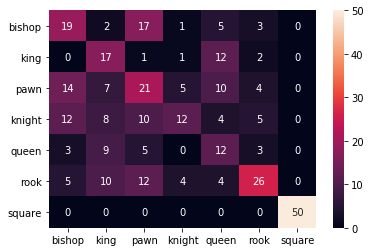

In [29]:
import seaborn as sns
ax = sns.heatmap(cmatrix, annot=True, xticklabels=['bishop','king','pawn','knight','queen','rook','square'],yticklabels=['bishop','king','pawn','knight','queen','rook','square'])

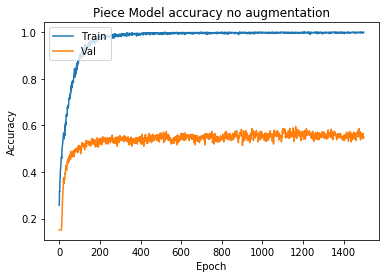

In [30]:
plt.plot(piece_hist.history['accuracy'])
plt.plot(piece_hist.history['val_accuracy'])
plt.title('Piece Model accuracy no augmentation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

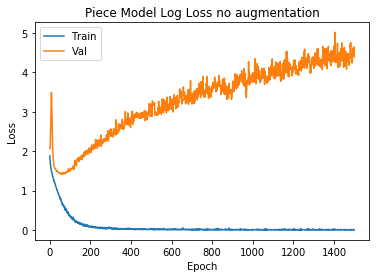

In [31]:
plt.plot(piece_hist.history['loss'])
plt.plot(piece_hist.history['val_loss'])
plt.title('Piece Model Log Loss no augmentation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [32]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

1.4452106330276175
